## Pew 2014

In [1]:
import pyreadstat
import pandas as pd
import matplotlib. pyplot as plt 
import numpy as np

In [10]:
# Taken from https://gist.github.com/rogerallen/1583593
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [2]:
survey_file = "../data/polarization/Pew/Polarization 2014/Polarization 2014 public.sav"
survey_df, survey_meta = pyreadstat.read_sav(survey_file)

In [4]:
slabel_to_state = survey_meta.value_labels["labels4"]
slabel_to_ideo = survey_df[["sstate", "ideoConsist"]]
slabel_to_ideo.loc[:, "state"] = slabel_to_ideo["sstate"].map(slabel_to_state)
slabel_to_ideo = slabel_to_ideo[["state", "ideoConsist"]]
slabel_to_ideo_var = survey_df.groupby("sstate")["ideoConsist"].var()
state_to_ideo_var = {slabel_to_state[sl] : ideo for sl, ideo in slabel_to_ideo_var.items()}

/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
sorted(state_to_ideo_var.items(), key = lambda x : x [1])

[('Wyoming', 13.490476190476183),
 ('Washington DC', 14.229885057471263),
 ('Delaware', 18.57894736842105),
 ('Connecticut', 21.328365160689344),
 ('Arkansas', 22.18772277227722),
 ('Tennessee', 23.513703169467064),
 ('Mississippi', 23.63898450946644),
 ('Kentucky', 23.99065797641217),
 ('South Carolina', 24.54067843353559),
 ('Nevada', 25.159824561403504),
 ('Alabama', 25.17834441980782),
 ('North Dakota', 25.215579710144926),
 ('West Virginia', 25.43510990665463),
 ('Idaho', 25.459174714661977),
 ('Oklahoma', 25.569820374015748),
 ('Kansas', 25.78627450980391),
 ('Nebraska', 25.982768361581925),
 ('South Dakota', 26.07311827956989),
 ('New York', 26.137879282038263),
 ('Indiana', 26.326016260162593),
 ('North Carolina', 26.339642967066787),
 ('New Jersey', 26.397519835765433),
 ('Louisiana', 26.57829567559479),
 ('Florida', 26.710497385846917),
 ('Texas', 26.774459234608965),
 ('Montana', 27.52),
 ('Minnesota', 27.670343464558535),
 ('Missouri', 27.73390354003326),
 ('Georgia', 27.97

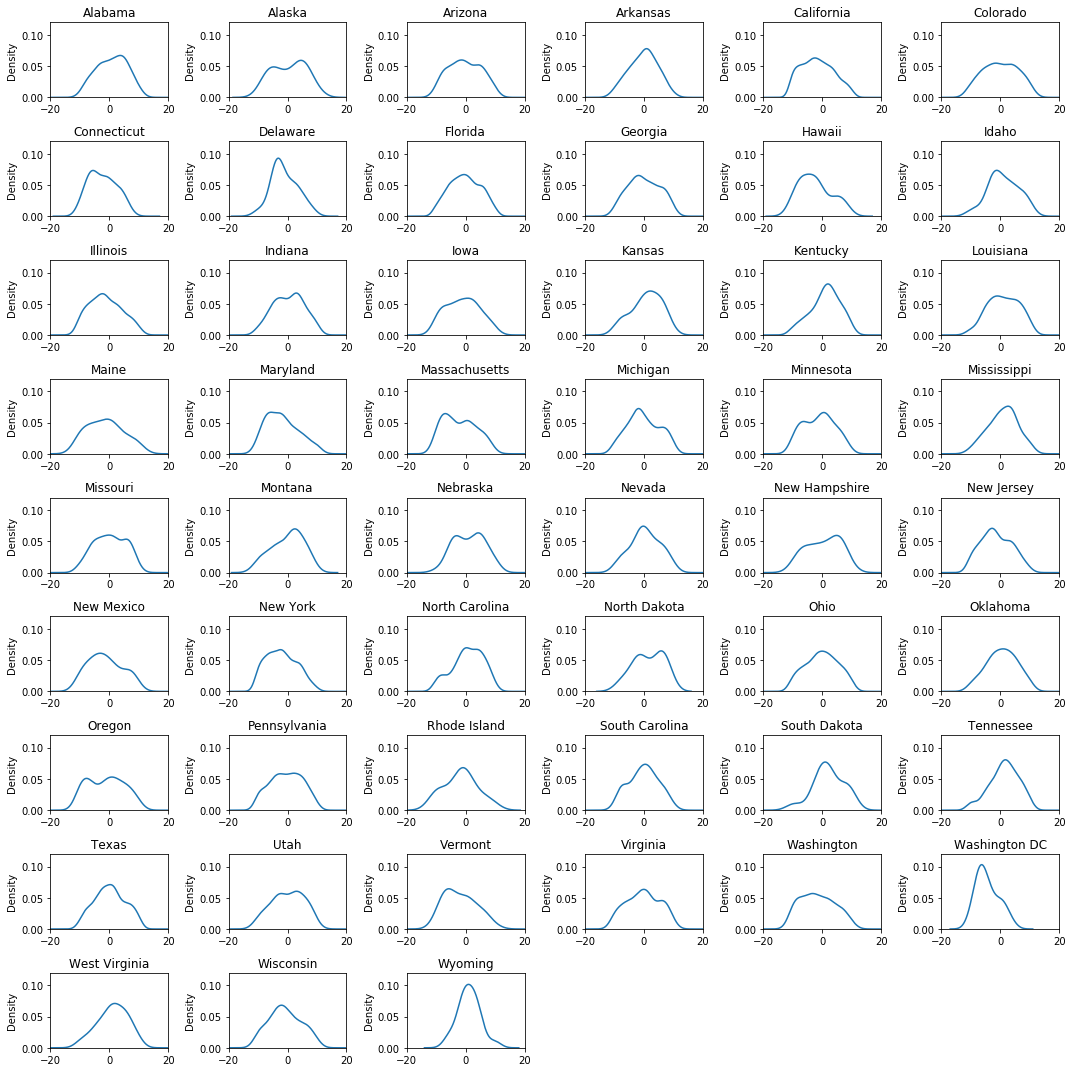

In [6]:
state_groups = slabel_to_ideo.groupby("state")

plt.figure(figsize=(15, 15))

for i, (state_name, ideo_con) in enumerate(state_groups):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(9, 6, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    ideo_con.plot(kind='density', xlim = (-20, 20), ylim = (0, 0.12), ax=ax)
    # set the title
    ax.set_title(state_name)
    ax.get_legend().remove()

plt.tight_layout()
plt.show()

In [7]:
state_to_ideo_var_file = "./data/state_mass_pol.csv"
with open(state_to_ideo_var_file, 'w') as f:
    f.write("{}, {}".format("state", "ideoConsistVariance"))
    f.write("\n")
    for s, i in state_to_ideo_var.items():
        f.write("{}, {}".format(s, i))
        f.write("\n")

## Shor & McCarty 2014

In [8]:
shor_mcarty_file = "../data/polarization/Shor & McCarty/shor_mc.sta"
shor_mcarty_all_df = pd.read_stata(shor_mcarty_file)
shor_mcarty_df = shor_mcarty_all_df.loc[shor_mcarty_all_df['year'] == 2014][["st", "h_distance", "s_distance"]]

In [37]:
# select all states with elections
state_to_dists = {}

for i, (state_name, h_dist, s_dist) in shor_mcarty_df.iterrows():
    state_name = abbrev_us_state[state_name]
    if state_name in state_to_ideo_var:
        state_to_dists[state_name] = (h_dist, s_dist)

In [42]:
state_to_dist_file = "./data/state_elite_pol.csv"
with open(state_to_dist_file, 'w') as f:
    f.write("{}, {}, {}".format("state", "h_dist", "s_dist"))
    f.write("\n")
    for s, (h_dist, s_dist) in state_to_dists.items():
        f.write("{}, {}, {}".format(s, h_dist, s_dist))
        f.write("\n")